###Import

In [ ]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import StratifiedGroupKFold

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#Глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
#from tensorflow.python.keras.optimizers import Adam, RMSprop

from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

## Подготовка данных для работы сети (обучения)

In [ ]:
#Загружаем даннные из датасета мнист

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


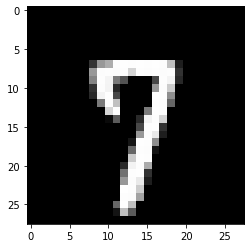

In [ ]:
#Смотрим случайное изображение

plt.imshow(Image.fromarray(x_train_org[888]).convert('RGBA'))
plt.show()

In [ ]:
##Преобразование данных

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [ ]:
# нормализация данных
x_train = x_train.astype('float32')
x_train = x_train /255

x_test = x_test.astype('float32')
x_test = x_test /255

In [ ]:
#OHE (one head encoding)
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
print(y_test[888])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


###Создаем нейронную сеть для множественной классификации

Epoch 1/30
120/120 [==============================] - 5s 8ms/step - loss: 0.4802 - accuracy: 0.8585 - val_loss: 0.2084 - val_accuracy: 0.9388
Epoch 2/30
120/120 [==============================] - 1s 5ms/step - loss: 0.1902 - accuracy: 0.9427 - val_loss: 0.1480 - val_accuracy: 0.9552
Epoch 3/30
120/120 [==============================] - 1s 6ms/step - loss: 0.1290 - accuracy: 0.9623 - val_loss: 0.1232 - val_accuracy: 0.9627
Epoch 4/30
120/120 [==============================] - 1s 6ms/step - loss: 0.0947 - accuracy: 0.9707 - val_loss: 0.1096 - val_accuracy: 0.9667
Epoch 5/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.1003 - val_accuracy: 0.9703
Epoch 6/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.1004 - val_accuracy: 0.9706
Epoch 7/30
120/120 [==============================] - 1s 6ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9727
Epoch 

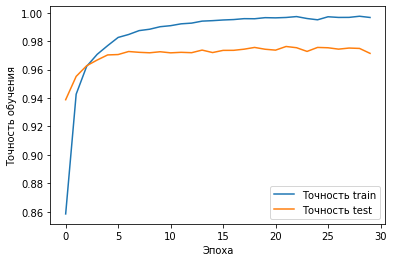

In [ ]:
from sklearn import metrics
# модель НС
model = Sequential()

# Входной полносвязный слой
model.add(Dense(400, input_dim = 784, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation= 'Softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

n = 30000

history = model.fit(x_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (x_train[n:], y_train[n:]),
                    verbose = 1)

plt.plot(history.history['accuracy'],
         label = 'Точность train')
plt.plot(history.history['val_accuracy'],
         label = 'Точность test')
plt.xlabel('Эпоха')
plt.ylabel('Точность обучения')
plt.legend()
plt.show()

### Сверточная нейронная сеть

###import

In [ ]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import StratifiedGroupKFold

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#Глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
#from tensorflow.python.keras.optimizers import Adam, RMSprop

from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Загружаем даннные из датасета мнист

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [ ]:
#OHE (one head encoding)
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)
print(y_test[10])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


###Преобразуем данные


In [ ]:
x_train = x_train_org.reshape(x_train_org.shape[0], 28,28,1)

x_test = x_test_org.reshape(x_test_org.shape[0], 28,28,1)

Epoch 1/30
120/120 [==============================] - 18s 144ms/step - loss: 2.8619 - accuracy: 0.6646 - val_loss: 0.4204 - val_accuracy: 0.8938
Epoch 2/30
120/120 [==============================] - 17s 143ms/step - loss: 0.4794 - accuracy: 0.8565 - val_loss: 0.2659 - val_accuracy: 0.9343
Epoch 3/30
120/120 [==============================] - 17s 142ms/step - loss: 0.3026 - accuracy: 0.9074 - val_loss: 0.1989 - val_accuracy: 0.9498
Epoch 4/30
120/120 [==============================] - 17s 141ms/step - loss: 0.2325 - accuracy: 0.9269 - val_loss: 0.1791 - val_accuracy: 0.9605
Epoch 5/30
120/120 [==============================] - 17s 138ms/step - loss: 0.1822 - accuracy: 0.9419 - val_loss: 0.1530 - val_accuracy: 0.9639
Epoch 6/30
120/120 [==============================] - 17s 139ms/step - loss: 0.1479 - accuracy: 0.9540 - val_loss: 0.1559 - val_accuracy: 0.9649
Epoch 7/30
120/120 [==============================] - 17s 139ms/step - loss: 0.1276 - accuracy: 0.9591 - val_loss: 0.1382 - val_ac

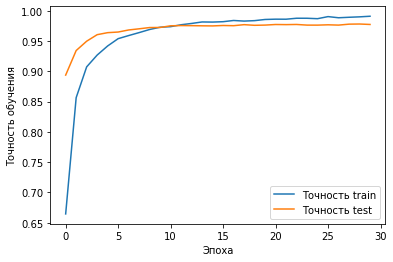

In [ ]:
from sklearn import metrics
# модель НС
model = Sequential()

# Входной сверточный слой
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Flatten())
model.add(Dense(100, input_dim = 784, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation= 'Softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

n = 30000

history = model.fit(x_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (x_train[n:], y_train[n:]),
                    verbose = 1)

plt.plot(history.history['accuracy'],
         label = 'Точность train')
plt.plot(history.history['val_accuracy'],
         label = 'Точность test')
plt.xlabel('Эпоха')
plt.ylabel('Точность обучения')
plt.legend()
plt.show()